In [237]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [238]:
data=pd.read_csv('C:/Users/Dell/Downloads/titanic_dataset.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Passenger ID as Index Column

In [291]:
data=data.set_index('PassengerId')

data


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.0,1,2,W./C. 6607,23.4500,NaN,S


In [292]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

# Basic Details Of the DataSet

Number of Passengers survived in each Class

Text(0.5, 1.0, 'Count Of Passengers Survived')

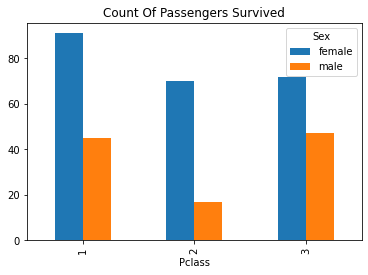

In [293]:
cc=data.groupby(['Pclass','Sex'])['Survived'].sum().unstack('Sex')
cc.plot(kind='bar')
plt.title('Count Of Passengers Survived')

Number of Passengers not survived in each Class

Text(0.5, 1.0, 'Count Of Passengers Not survived')

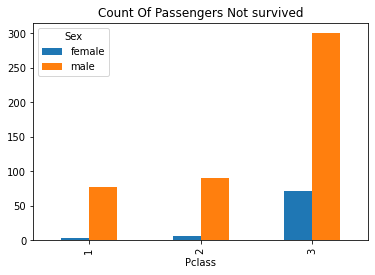

In [294]:
dd=data.groupby(['Pclass','Sex'])['Survived'].count().unstack('Sex')
ee=dd-cc
ee.plot(kind='bar')
plt.title('Count Of Passengers Not survived')

Fare Comparison of Various Classes

Text(0.5, 1.0, 'Fare Comparison of Various Classes')

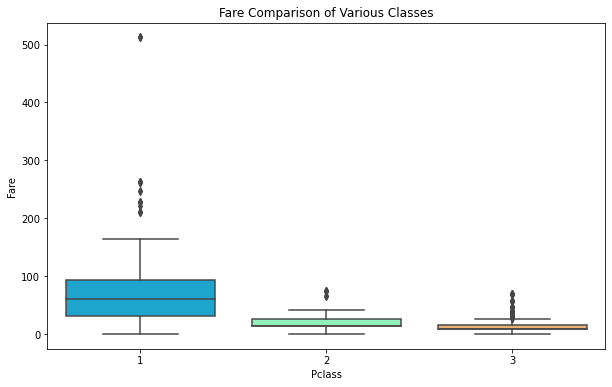

In [295]:
a=data[['Pclass','Fare']]
plt.figure(figsize=(10,6))
sns.boxplot(x='Pclass',y='Fare',data=a,palette='rainbow')
plt.title('Fare Comparison of Various Classes')

Age by Passenger Class

Text(0.5, 1.0, 'Age by Passenger Class')

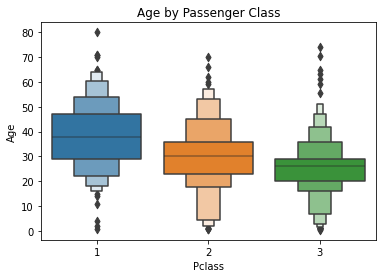

In [296]:
apc=data[['Age','Pclass']]
sns.boxenplot(x='Pclass',y='Age',data=apc)
plt.title('Age by Passenger Class')

Average fair price by Embarked Town

<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

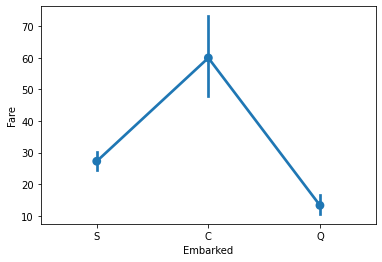

In [297]:
aft=data[['Fare','Embarked']]
sns.pointplot(x='Embarked',y='Fare',data=aft)

Count of Passengers Embarked from Each Port

<AxesSubplot:xlabel='Embarked'>

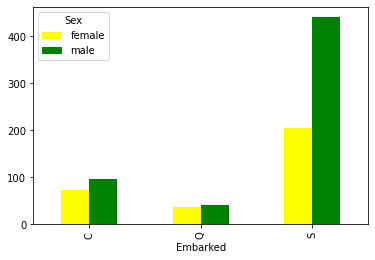

In [298]:
grp=data.groupby(['Embarked','Sex'])['Embarked'].count().unstack('Sex')
grp.plot(kind='bar',color=['yellow','green'])

# Filling Missing Values

Filling Age 

In [299]:
data.groupby(['Pclass','Sex'])['Age'].mean().unstack('Sex')

Sex,female,male
Pclass,,
1,34.553191,41.232951
2,28.703947,30.678981
3,21.531250,26.370086


In [300]:
data.Age[(data['Age'].isnull()) & (data['Sex']=='female') & (data['Pclass']==1)]=34
data.Age[(data['Age'].isnull()) & (data['Sex']=='male') & (data['Pclass']==1)]=41
data.Age[(data['Age'].isnull()) & (data['Sex']=='female') & (data['Pclass']==2)]=28
data.Age[(data['Age'].isnull()) & (data['Sex']=='male') & (data['Pclass']==2)]=30
data.Age[(data['Age'].isnull()) & (data['Sex']=='female') & (data['Pclass']==3)]=21
data.Age[(data['Age'].isnull()) & (data['Sex']=='male') & (data['Pclass']==3)]=26

C:\Users\Dell\AppData\Local\Temp/ipykernel_6816/457062187.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Age[(data['Age'].isnull()) & (data['Sex']=='female') & (data['Pclass']==1)]=34
C:\Users\Dell\AppData\Local\Temp/ipykernel_6816/457062187.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Age[(data['Age'].isnull()) & (data['Sex']=='male') & (data['Pclass']==1)]=41
C:\Users\Dell\AppData\Local\Temp/ipykernel_6816/457062187.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

In [301]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.0,1,2,W./C. 6607,23.4500,NaN,S


In [322]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

Filling Embarked

In [303]:
data['Embarked'].fillna('S',inplace=True)


# Handling Outliers

Age as an Outlier

In [304]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.0,1,2,W./C. 6607,23.4500,NaN,S


In [305]:
data['Fare'].max()

512.3292

<AxesSubplot:>

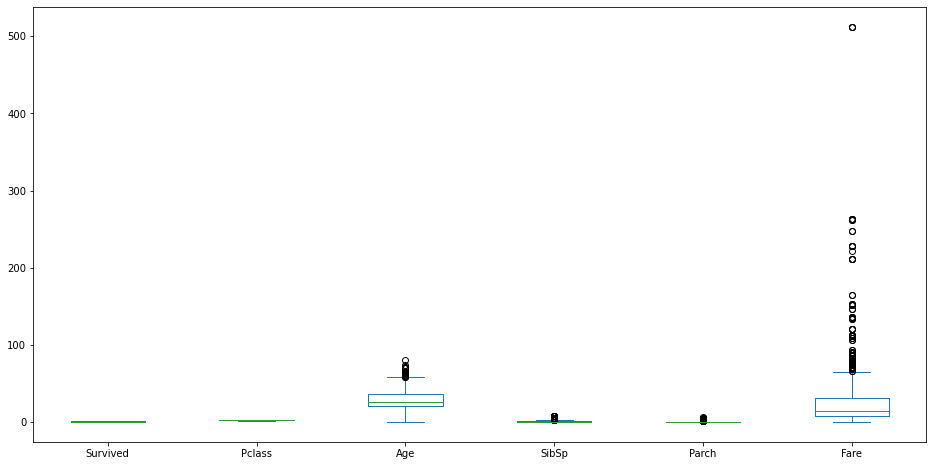

In [306]:
data.plot(kind='box',figsize=(16,8))

<AxesSubplot:>

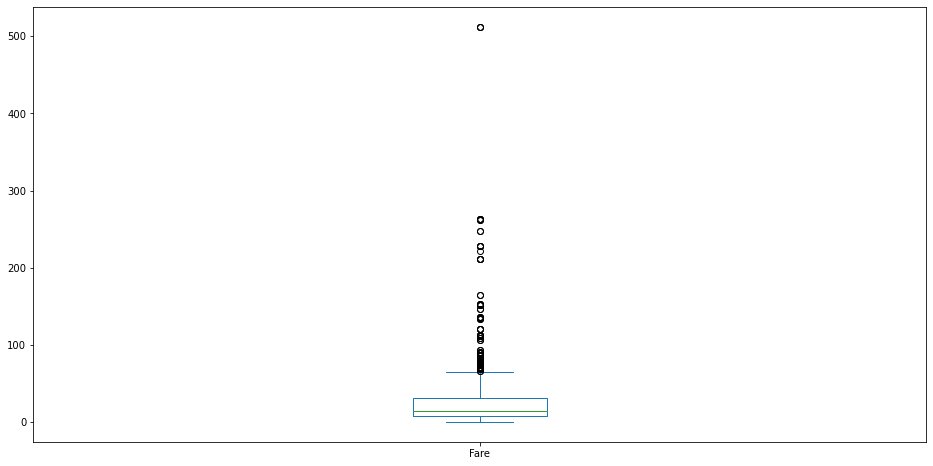

In [307]:
data['Fare'].plot(kind='box',figsize=(16,8))

<AxesSubplot:ylabel='Frequency'>

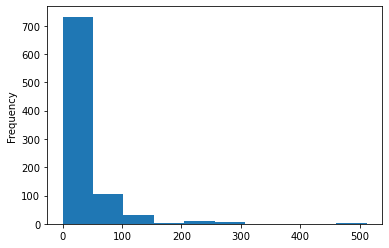

In [308]:
data['Fare'].plot(kind='hist')

In [309]:
print(data['Age'].skew())
print(data['Fare'].skew())

0.5158421418008365
4.787316519674893


In [310]:
q1=data['Fare'].quantile(.25)
q2=data['Fare'].quantile(.5)
q3=data['Fare'].quantile(.75)
print(q1)
print(q2)
print(q3)

7.9104
14.4542
31.0


In [311]:
IQR=q3-q1

In [312]:
lower_limit=q1-(1.5*IQR)
upper_limit=q3+(1.5*IQR)
print(lower_limit)
print(upper_limit)

-26.724
65.6344


In [333]:
data.loc[(data['Fare']>upper_limit) | (data['Fare']<lower_limit)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,34.0,1,0,PC 17569,146.5208,B78,C
35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...
847,0,3,"Sage, Mr. Douglas Bullen",male,26.0,8,2,CA. 2343,69.5500,NaN,S
850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,34.0,1,0,17453,89.1042,C92,C
857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S


Replace with mean

In [341]:
data['Fare'].mean()

32.2042079685746

In [330]:
new_data=data.replace(data.loc[(data['Fare']>upper_limit) | (data['Fare']<lower_limit),'Fare'],32)
new_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.0,1,2,W./C. 6607,23.4500,NaN,S


SibSp as Outlier

<AxesSubplot:>

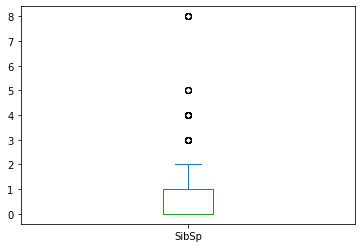

In [267]:
data['SibSp'].plot(kind='box')

<AxesSubplot:ylabel='Frequency'>

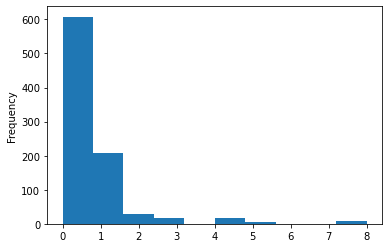

In [268]:
data['SibSp'].plot(kind='hist')

In [269]:
data['SibSp'].skew()

3.6953517271630565

In [335]:
q1=data['SibSp'].quantile(.25)
q2=data['SibSp'].quantile(.5)
q3=data['SibSp'].quantile(.75)
print(q1)
print(q2)
print(q3)

0.0
0.0
1.0


In [336]:
IQR=q3-q1
lower_limit=q1-(1.5*IQR)
upper_limit=q3+(1.5*IQR)
print(lower_limit)
print(upper_limit)

-1.5
2.5


In [337]:
data.loc[(data['SibSp']>upper_limit) | (data['SibSp']<lower_limit)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S
60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S
64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,NaN,S
69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S
72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,NaN,S


Replace with mean Value

In [338]:
data['SibSp'].mean()

0.5230078563411896

In [340]:
data.replace(data.loc[(data['SibSp']>upper_limit) | (data['SibSp']<lower_limit),'SibSp'],.52)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.0,1,2,W./C. 6607,23.4500,NaN,S


# Do min max scaling on the feature set (Take ‘Survived’ as target)

In [342]:
data.Survived.nunique()

2

In [343]:
data.Survived

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [345]:
data['Survived'].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

importing the Preprocessing ans Scaler Functions from Sklearn

In [346]:
from sklearn  import preprocessing


In [347]:

scaler =preprocessing. StandardScaler()


In [349]:
Survive_minmax = pd.DataFrame(data['Survived'])


In [350]:
minmaxscale=preprocessing.MinMaxScaler()


In [351]:
Survive_minmax=minmaxscale.fit_transform(Survive_minmax)


In [352]:
Survive_minmax=pd.DataFrame(Survive_minmax)


In [353]:
Survive_minmax.describe()

,0
count,891.000000
mean,0.383838
std,0.486592
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000
